# <center><font color = '#DF9166' size = 20 center> **Modeling**</font></center>



## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Modeling**](#modeling)


## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [1]:
import os
import sys
import warnings

warnings.filterwarnings("ignore")

In [2]:
sys.path.append(os.path.abspath(os.path.pardir))
from scripts.train_models import TimeSeriesForecaster

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>


In [40]:
# Define file paths
tsla_path = f"../data/processed/TSLA.csv"
bnd_path = f"../data/processed/BND.csv"
spy_path = f"../data/processed/SPY.csv"

# Initialize model forecasters for each asset
tsla_forecaster = TimeSeriesForecaster(tsla_path, model_type="LSTM")
bnd_forecaster = TimeSeriesForecaster(bnd_path, model_type="ARIMA")
spy_forecaster = TimeSeriesForecaster(spy_path, model_type="SARIMA")

Initializing LSTM model with params: p=1, d=1, q=1
Initializing ARIMA model with params: p=1, d=1, q=1
Initializing SARIMA model with params: p=1, d=1, q=1


In [41]:
# Load and split data
tsla_forecaster.load_data()
tsla_forecaster.train_test_split()

bnd_forecaster.load_data()
bnd_forecaster.train_test_split()

spy_forecaster.load_data()
spy_forecaster.train_test_split()

Loading data from /content/drive/MyDrive/10 acadamy/W11 Challenge/data/processed/TSLA.csv...
Data loaded successfully!


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,0.010723,0.009519,0.010743,0.011513,0.067348
2015-01-05,0.009416,0.008578,0.009835,0.010324,0.077377
2015-01-06,0.009584,0.008257,0.009397,0.009682,0.092210
2015-01-07,0.009538,0.008338,0.010225,0.010153,0.037529
2015-01-08,0.009491,0.008201,0.010259,0.010075,0.045400


Training size: 1774, Validation size: 380, Testing size: 381
Loading data from /content/drive/MyDrive/10 acadamy/W11 Challenge/data/processed/BND.csv...
Data loaded successfully!


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,0.041989,0.039219,0.033971,0.030310,0.069474
2015-01-05,0.052702,0.049473,0.046467,0.044122,0.182236
2015-01-06,0.063412,0.069978,0.061192,0.057041,0.121726
2015-01-07,0.065647,0.065523,0.062088,0.061944,0.076193
2015-01-08,0.059842,0.057942,0.058516,0.060606,0.058659


Training size: 1774, Validation size: 380, Testing size: 381
Loading data from /content/drive/MyDrive/10 acadamy/W11 Challenge/data/processed/SPY.csv...
Data loaded successfully!


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,0.034865,0.035209,0.037303,0.037569,0.207805
2015-01-05,0.027983,0.030553,0.032045,0.033475,0.306716
2015-01-06,0.024459,0.027493,0.027418,0.029621,0.387867
2015-01-07,0.029078,0.027493,0.031171,0.028380,0.215775
2015-01-08,0.035737,0.033874,0.036950,0.033178,0.260687


Training size: 1774, Validation size: 380, Testing size: 381


## <font color = '#DF9166' size=6>**Modeling**<font/><a class = 'anchor' id = 'modeling'/>


###  Optimize parameters for ARIMA/SARIMA

In [42]:
bnd_forecaster.optimize_parameters()

Optimizing ARIMA parameters using auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10616.720, Time=9.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10568.597, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10567.013, Time=1.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10567.144, Time=3.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10568.511, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10588.983, Time=1.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-10587.844, Time=1.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-10610.704, Time=3.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-10575.034, Time=11.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10576.311, Time=2.98 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-10591.229, Time=1.85 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-10596.852, Time=1.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.13 sec
 ARIMA(2,1,2)(0,0,0)[0]       

In [43]:
spy_forecaster.optimize_parameters()

Optimizing ARIMA parameters using auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-12946.064, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12890.192, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12933.980, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12925.966, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12887.475, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-12945.154, Time=1.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-12942.094, Time=0.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-12947.520, Time=4.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-12941.949, Time=2.72 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-12950.394, Time=5.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-12953.436, Time=1.56 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-12955.714, Time=0.66 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-12944.500, Time=2.40 sec
 ARIMA(5,1,0)(0,0,0)[0] i

### Train models

In [44]:
tsla_forecaster.train_model()

Training LSTM model...
Epoch 1/20
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0178

111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0176
Epoch 2/20
107/111 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3729e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.3778e-04
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 5.1971e-04
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2049e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4.2069e-04
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.9222e-04
Epoch 6/20
107/111 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.7139e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 4.6935e-04
Epoch 7/20
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0920e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0898e-04
Epoch 8/20
108/111 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2493e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2324e-04
Epoch 9/20
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2328e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2228e-04
Epoch 10/20
109/111 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.1667e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.1725e-04
Epoch 11/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.6574e-04
Epoch 12/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.9095e-04
Epoch 13/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8902e-04
Epoch 14/20
108/111 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1661e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.1561e-04
Epoch 15/20
106/111 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.9028e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.8965e-04
Epoch 16/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.9787e-04
Epoch 17/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.6944e-04
Epoch 18/20
108/111 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.0360e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3.0253e-04
Epoch 19/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.6389e-04
Epoch 20/20
108/111 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6666e-04

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.6619e-04


Saving model checkpoint to /content/drive/MyDrive/10 acadamy/W11 Challenge/checkpoints/LSTM_model.h5
Model training complete!


In [45]:
bnd_forecaster.train_model()

Training ARIMA model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Saving model checkpoint to /content/drive/MyDrive/10 acadamy/W11 Challenge/checkpoints/ARIMA_model.h5
Model training complete!


In [46]:
spy_forecaster.train_model()

Training SARIMA model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Saving model checkpoint to /content/drive/MyDrive/10 acadamy/W11 Challenge/checkpoints/SARIMA_model.h5
Model training complete!


### Evaluate models


In [47]:
tsla_forecaster.evaluate_model()

Evaluating model...
Forecasting next 381 steps...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

(0.48454528836287675, 0.2602894594804185, 1.1245181752417082)

In [48]:
bnd_forecaster.evaluate_model()

Evaluating model...
Forecasting next 381 steps...
Forecasting complete!
MAE: 0.3064, RMSE: 0.1121, MAPE: 0.7960


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


(0.3064288633598202, 0.11205218528328124, 0.7960461583259884)

In [49]:
spy_forecaster.evaluate_model()

Evaluating model...
Forecasting next 381 steps...
Forecasting complete!
MAE: 0.1705, RMSE: 0.0431, MAPE: 0.1985


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


(0.17052450846098827, 0.04305097490875226, 0.19853165901845138)

### Plot forecasts


Forecasting next 381 steps...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━

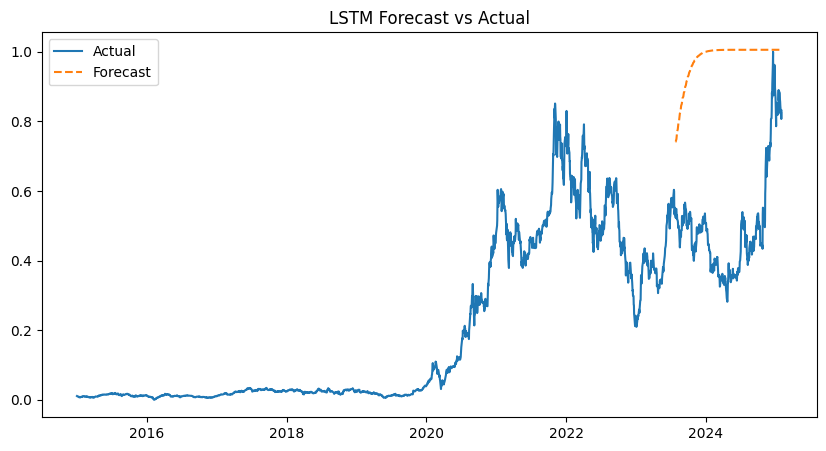

In [50]:
tsla_forecaster.plot_forecast()

Forecasting next 381 steps...
Forecasting complete!


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


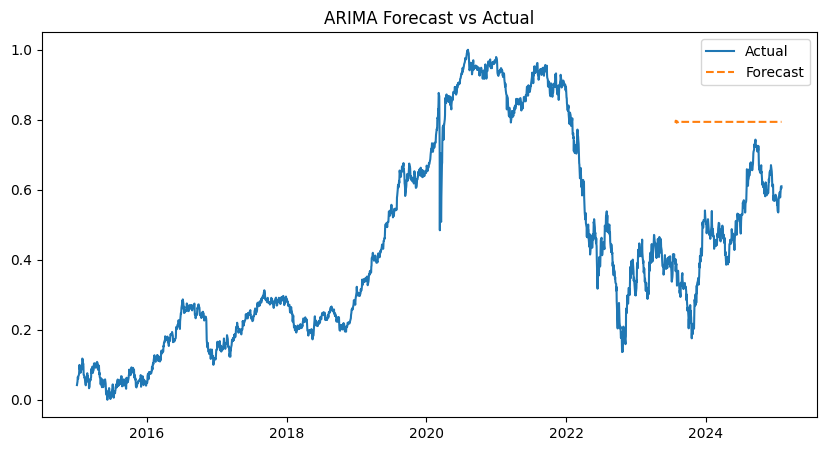

In [51]:
bnd_forecaster.plot_forecast()

Forecasting next 381 steps...
Forecasting complete!


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


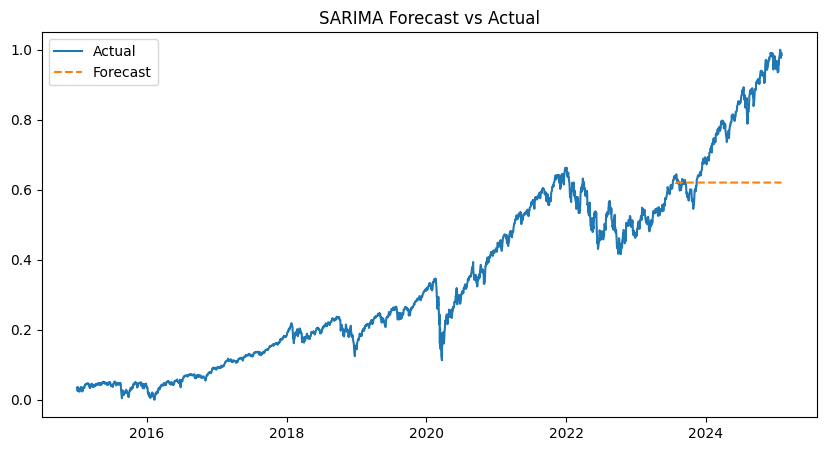

In [52]:
spy_forecaster.plot_forecast()